# Explore CMIP6 AMOC data

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import os
import xarray as xr
from data_loading_functions import *
import matplotlib.gridspec as gridspec

datadir = '../../Other_data/AMOC_CMIP6/'

In [2]:
h2o_rho = 1035 # kg/m**3

file_list = [ f.name for f in os.scandir(datadir) if f.is_file()]
models = {}
col_names = ["model", "member", "AMOC year 1 (Sv)", "AMOC year 150 (Sv)", "perc. change in year 150"]

df = pd.DataFrame([], columns = col_names)

for file in file_list:
    model_name = file.rsplit('_')[1];
    member = file.rsplit('_')[-1][:-3]

    model_ds = xr.load_dataset(datadir + file)
    amoc_strength = model_ds.amoc_a4x/h2o_rho/10**6 # in Sv
    amoc_year1 = amoc_strength[0].values; amoc_year150 = amoc_strength[150-1].values
    amoc_change = np.round((1 - amoc_year150/amoc_year1)*100,2) # % decrease from year 1 to year 150
    
    if model_name not in models:
        models[model_name] = []
    
    models[model_name].append(member)
    df_row = pd.DataFrame([[model_name, member, np.round(amoc_year1,2), np.round(amoc_year150,2), amoc_change]], columns=col_names)
    # Append the new row
    df = pd.concat([df, df_row], ignore_index=True)
    
#df.to_csv('../cmip6_abrupt-4xCO2_amoc_table.csv', index=False)
df

C:\Users\hege.fredriksen\AppData\Local\Temp\ipykernel_24664\1304105628.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, df_row], ignore_index=True)


,model,member,AMOC year 1 (Sv),AMOC year 150 (Sv),perc. change in year 150
0,ACCESS-CM2,r1i1p1f1,21.52,5.69,73.55
1,ACCESS-ESM1-5,r1i1p1f1,21.51,15.07,29.95
2,CanESM5,r1i1p1f1,12.39,5.44,56.14
3,CESM2-FV2,r1i1p1f1,22.92,3.20,86.05
4,CESM2-WACCM-FV2,r1i1p1f1,23.61,4.51,80.90
5,CESM2-WACCM,r1i1p1f1,24.33,6.10,74.94
6,CESM2,r1i1p1f1,22.84,4.22,81.53
7,CMCC-CM2-SR5,r1i1p1f1,21.57,9.28,56.99
8,CMCC-ESM2,r1i1p1f1,21.39,10.08,52.87
9,CNRM-CM6-1,r1i1p1f2,18.97,2.81,85.20


In [3]:
rmse_df = pd.read_table('../cmip6_abrupt-4xCO2_rmse_table.csv', sep=',')
all_joined = pd.merge(df, rmse_df, on=['model', 'member'], how='outer')
all_sorted = all_joined.sort_values(by = '% change2')
matching_rows = pd.merge(df, rmse_df, on=['model', 'member'], how='inner')

all_above3perc = all_joined[all_joined['% change2'] < -3]
matching_above3perc = matching_rows[matching_rows['% change2'] < -3]

all_neg_rmse = all_joined[all_joined['% change2'] < 0]
matching_neg_rmse = matching_rows[matching_rows['% change2'] < 0]

all_below3perc = all_joined[all_joined['% change2'] > -3]
matching_below3perc = matching_rows[matching_rows['% change2'] > -3]

#sorted_models = only_neg_rmse.sort_values(by = '% change2')

In [4]:

matching_above3perc.sort_values(by = '% change2')

,model,member,AMOC year 1 (Sv),AMOC year 150 (Sv),perc. change in year 150,RMSE two-exp,RMSE three-exp,RMSE two-exp + osc,% change1,% change2
32,MRI-ESM2-0,r1i2p1f1,24.73,1.84,92.58,0.111468,0.108991,0.083140,-2.222,-23.718
31,MRI-ESM2-0,r1i1p1f1,21.91,2.66,87.85,0.102650,0.102020,0.085217,-0.614,-16.470
29,MRI-ESM2-0,r10i1p1f1,21.43,2.46,88.51,0.117661,0.115566,0.098643,-1.781,-14.644
37,SAM0-UNICON,r1i1p1f1,26.45,5.45,79.39,0.127195,0.127195,0.110521,0.000,-13.109
30,MRI-ESM2-0,r13i1p1f1,21.57,1.94,90.99,0.101483,0.098642,0.087937,-2.800,-10.852
18,GISS-E2-1-G,r102i1p1f1,27.55,1.91,93.06,0.146821,0.146418,0.134083,-0.275,-8.424
35,NorESM2-LM,r1i1p1f1,23.56,7.17,69.57,0.175370,0.175370,0.161819,0.000,-7.727
0,ACCESS-CM2,r1i1p1f1,21.52,5.69,73.55,0.095814,0.095814,0.088856,0.000,-7.261
34,MRI-ESM2-0,r7i1p1f1,22.26,3.22,85.55,0.111105,0.100982,0.093739,-9.111,-7.172
4,CESM2-WACCM-FV2,r1i1p1f1,23.61,4.51,80.90,0.118114,0.115412,0.108279,-2.287,-6.181


In [5]:
matching_above3perc

,model,member,AMOC year 1 (Sv),AMOC year 150 (Sv),perc. change in year 150,RMSE two-exp,RMSE three-exp,RMSE two-exp + osc,% change1,% change2
0,ACCESS-CM2,r1i1p1f1,21.52,5.69,73.55,0.095814,0.095814,0.088856,0.000,-7.261
3,CESM2-FV2,r1i1p1f1,22.92,3.20,86.05,0.131137,0.121551,0.115524,-7.310,-4.958
4,CESM2-WACCM-FV2,r1i1p1f1,23.61,4.51,80.90,0.118114,0.115412,0.108279,-2.287,-6.181
5,CESM2-WACCM,r1i1p1f1,24.33,6.10,74.94,0.086379,0.081091,0.078569,-6.122,-3.109
10,CNRM-ESM2-1,r1i1p1f2,20.71,4.15,79.96,0.119653,0.119653,0.114664,0.000,-4.169
18,GISS-E2-1-G,r102i1p1f1,27.55,1.91,93.06,0.146821,0.146418,0.134083,-0.275,-8.424
19,GISS-E2-1-G,r1i1p3f1,27.82,2.47,91.13,0.157757,0.157274,0.149747,-0.306,-4.785
20,GISS-E2-1-G,r1i1p5f1,26.60,2.44,90.84,0.185252,0.179325,0.171317,-3.199,-4.465
23,HadGEM3-GC31-MM,r1i1p1f3,19.43,5.06,73.98,0.142966,0.091853,0.088862,-35.752,-3.257
29,MRI-ESM2-0,r10i1p1f1,21.43,2.46,88.51,0.117661,0.115566,0.098643,-1.781,-14.644


In [7]:
pd.set_option('display.max_rows', None)
#all_sorted[:26]

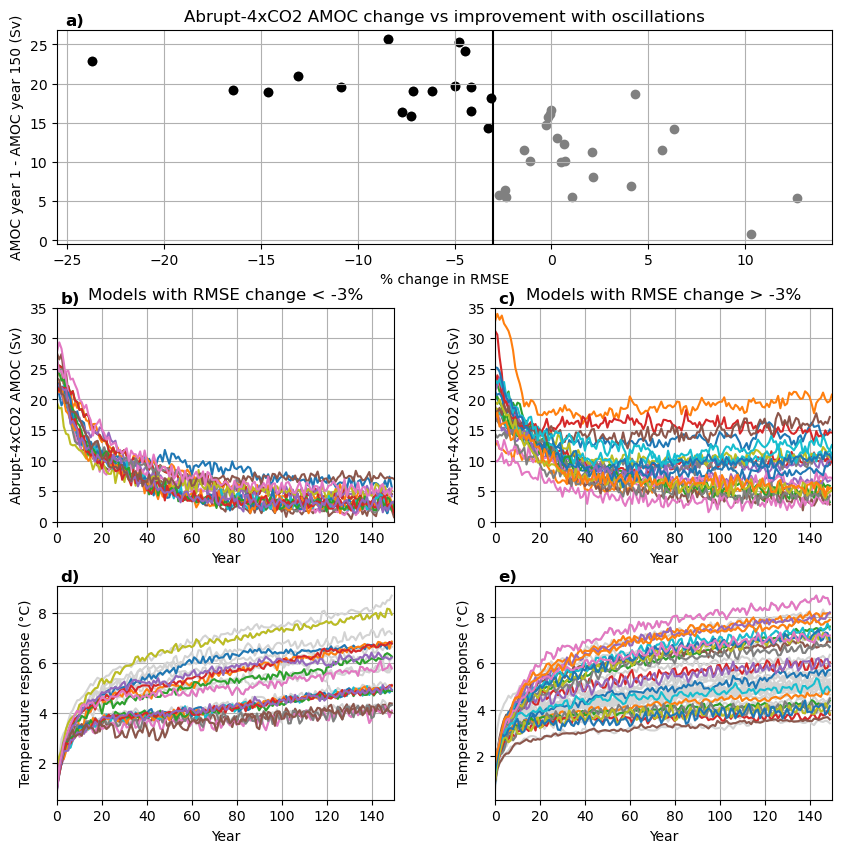

In [9]:
fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(3, 2, height_ratios=[1, 1, 1], width_ratios=[1, 1])

# Top plot (spans both columns)
ax1 = plt.subplot(gs[0, :])
ax = ax1;
ax.scatter(matching_rows["% change2"], matching_rows["AMOC year 1 (Sv)"]-matching_rows["AMOC year 150 (Sv)"], color = 'gray')
ax.scatter(matching_above3perc["% change2"], matching_above3perc["AMOC year 1 (Sv)"]-matching_above3perc["AMOC year 150 (Sv)"], color = 'black')
ax.set_ylabel('AMOC year 1 - AMOC year 150 (Sv)')
ax.set_xlabel('% change in RMSE')
ax.grid()
#ax.axvline(0, color = 'black')
ax.axvline(-3.0, color = 'black')
ax.set_title('Abrupt-4xCO2 AMOC change vs improvement with oscillations')
ax.text(0.01, 1.02, 'a)', transform=ax.transAxes, fontsize = 12, fontweight = 'bold');


# middle left plot
ax2 = plt.subplot(gs[1, 0])
ax = ax2;
# set water density
h2o_rho = 1035 # kg/m**3
for (i,model) in enumerate(matching_above3perc['model']):
    member = matching_above3perc['member'].iloc[i]
    model_files = [file for file in file_list if model in file]
    member_file = [file for file in model_files if member in file]
    model_ds = xr.load_dataset(datadir + member_file[0])
    (model_ds.amoc_a4x/h2o_rho/10**6).plot()
ax.set_xlim(0,150)
ax.set_ylim(0,35)
ax.grid()
ax.set_ylabel('Abrupt-4xCO2 AMOC (Sv)')
ax.set_xlabel('Year')
ax.set_title('Models with RMSE change < -3%')
ax.text(0.01, 1.02, 'b)', transform=ax.transAxes, fontsize = 12, fontweight = 'bold');


# middle right plot
ax3 = plt.subplot(gs[1, 1])
ax = ax3;
# set water density
h2o_rho = 1035 # kg/m**3
for (i,model) in enumerate(matching_below3perc['model']):
    member = matching_below3perc['member'].iloc[i]
    model_files = [file for file in file_list if model in file]
    member_file = [file for file in model_files if member in file]
    model_ds = xr.load_dataset(datadir + member_file[0])
    (model_ds.amoc_a4x/h2o_rho/10**6).plot()
ax.set_xlim(0,150)
ax.set_ylim(0,35)
ax.grid()
ax.set_ylabel('Abrupt-4xCO2 AMOC (Sv)')
ax.set_xlabel('Year')
ax.set_title('Models with RMSE change > -3%')
ax.text(0.01, 1.02, 'c)', transform=ax.transAxes, fontsize = 12, fontweight = 'bold');


# Bottom left plot
ax4 = plt.subplot(gs[2, 0])
ax = ax4;

for (i,model) in enumerate(all_above3perc['model']):
    member = all_above3perc['member'].iloc[i]
    data = load_anom(model, 'abrupt-4xco2', member, length_restriction = 150)
    ax.plot(data['tas'].values, color = 'lightgray')
    # plots all models in gray

# then models with amoc data in color:
for (i,model) in enumerate(matching_above3perc['model']):
    member = matching_above3perc['member'].iloc[i]
    data = load_anom(model, 'abrupt-4xco2', member, length_restriction = 150)
    ax.plot(data['tas'].values)

ax.set_xlim(0,150)
#ax.set_ylim(0,9)
ax.grid()
ax.set_ylabel('Temperature response (°C)')
ax.set_xlabel('Year')
ax.text(0.01, 1.02, 'd)', transform=ax.transAxes, fontsize = 12, fontweight = 'bold');



# Bottom right plot
ax5 = plt.subplot(gs[2, 1])
ax = ax5;
for (i,model) in enumerate(all_below3perc['model']):
    member = all_below3perc['member'].iloc[i]
    data = load_anom(model, 'abrupt-4xco2', member, length_restriction = 150)
    ax.plot(data['tas'].values, color = 'lightgray')
    # plots all models in gray

# then models with amoc data in color:
for (i,model) in enumerate(matching_below3perc['model']):
    member = matching_below3perc['member'].iloc[i]
    data = load_anom(model, 'abrupt-4xco2', member, length_restriction = 150)
    ax.plot(data['tas'].values)

ax.set_xlim(0,150)
#ax.set_ylim(0,9)
ax.grid()
ax.set_ylabel('Temperature response (°C)')
ax.set_xlabel('Year')
ax.text(0.01, 1.02, 'e)', transform=ax.transAxes, fontsize = 12, fontweight = 'bold');



# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.3, wspace=0.3)

#plt.savefig('../amoc_vs_temp_responses.pdf', format='pdf', dpi=600, bbox_inches="tight") 

